In [1]:
import pandas as pd
import numpy as np

<h1>EDA question 3

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost
0,Office Supplies,Budapest,Hungary,AT-7352,Annie Thurman,EMEA,01-01-2011,HU-2011-1220,High,OFF-TEN-10001585,...,05-01-2011,Second Class,Budapest,Storage,0.0,1,29.640,4,66,8.17
1,Office Supplies,Stockholm,Sweden,EM-141402,Eugene Moren,EU,01-01-2011,IT-2011-3647632,High,OFF-PA-10001492,...,05-01-2011,Second Class,Stockholm,Paper,0.5,1,-26.055,3,45,4.82
2,Office Supplies,Constantine,Algeria,TB-112801,Toby Braunhardt,Africa,01-01-2011,AG-2011-2040,Medium,OFF-TEN-10000025,...,06-01-2011,Standard Class,Constantine,Storage,0.0,1,106.140,2,408,35.46
3,Furniture,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,01-01-2011,IN-2011-47883,Medium,FUR-FU-10003447,...,08-01-2011,Standard Class,New South Wales,Furnishings,0.1,1,37.770,5,114,4.70
4,Office Supplies,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,01-01-2011,IN-2011-47883,Medium,OFF-PA-10001968,...,08-01-2011,Standard Class,New South Wales,Paper,0.1,1,15.342,2,55,1.80


In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

In [28]:
print(df.columns)
print(df.shape)

Index(['Category', 'City', 'Country', 'Customer ID', 'Customer Name', 'Market',
       'Order Date', 'Order ID', 'Order Priority', 'Product ID',
       'Product Name', 'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode',
       'State', 'Sub-Category', 'Discount', 'Number of Records', 'Profit',
       'Quantity', 'Sales', 'Shipping Cost'],
      dtype='object')
(51290, 24)


In [29]:
df['Customer ID'].nunique()

4873

In [30]:
df2 = df.groupby(['Customer ID']).aggregate({'Ship Date': ['min']}) 
df2.head()

,Ship Date
,min
Customer ID,
AA-103151,06-01-2014
AA-103152,07-08-2014
AA-103153,11-02-2013
AA-103154,05-04-2011
AA-103751,02-09-2012


In [31]:
df2.columns = list(map(''.join, df2.columns.values))
df2.head()

,Ship Datemin
Customer ID,
AA-103151,06-01-2014
AA-103152,07-08-2014
AA-103153,11-02-2013
AA-103154,05-04-2011
AA-103751,02-09-2012


In [32]:
df2['Ship Datemin'] = pd.to_datetime(df2['Ship Datemin'],dayfirst=True)
for i in range(len(df2)):
    df2.iloc[i,0] = df2.iloc[i,0].year
df2.head()

,Ship Datemin
Customer ID,
AA-103151,2014
AA-103152,2014
AA-103153,2013
AA-103154,2011
AA-103751,2012


In [33]:
RFM_scores = pd.read_csv('q6_RFM_ANALYSIS.csv')
RFM_scores.head()

,Customer ID,Recency Score,Frequency Score,Monetary Score,Overall Score
0,PB-192102,5,5,5,5.0
1,RA-199154,5,5,5,5.0
2,PS-190453,5,5,5,5.0
3,AT-107352,5,5,5,5.0
4,MM-179203,5,5,5,5.0


In [34]:
df.drop_duplicates(subset ='Customer ID',keep = 'first', inplace = True) 
df['Customer ID'].nunique()

4873

In [35]:
RFM_scores.index = RFM_scores['Customer ID']
RFM_scores.drop(columns='Customer ID',inplace=True)
RFM_scores.head()

,Recency Score,Frequency Score,Monetary Score,Overall Score
Customer ID,,,,
PB-192102,5,5,5,5.0
RA-199154,5,5,5,5.0
PS-190453,5,5,5,5.0
AT-107352,5,5,5,5.0
MM-179203,5,5,5,5.0


In [36]:
series = RFM_scores['Overall Score'].loc[df['Customer ID']]

In [37]:
(series.loc[df['Customer ID']])

Customer ID
AT-7352      2.000000
EM-141402    1.666667
TB-112801    1.333333
JH-159851    4.666667
MM-72602     1.000000
               ...   
RF-93452     3.666667
DB-35551     3.666667
DJ-34202     3.666667
GH-46652     3.666667
LP-70951     3.666667
Name: Overall Score, Length: 4873, dtype: float64

In [38]:
df['RFM'] = np.asarray(series.loc[df['Customer ID']])
df['Monetary'] = np.asarray(RFM_scores['Monetary Score'].loc[df['Customer ID']])
df['Recency'] = np.asarray(RFM_scores['Recency Score'].loc[df['Customer ID']])
df['Frequency'] = np.asarray(RFM_scores['Frequency Score'].loc[df['Customer ID']])
df.head()

,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost,RFM,Monetary,Recency,Frequency
0,Office Supplies,Budapest,Hungary,AT-7352,Annie Thurman,EMEA,2011-01-01,HU-2011-1220,High,OFF-TEN-10001585,...,0.0,1,29.640,4,66.0,8.17,2.000000,1,4,1
1,Office Supplies,Stockholm,Sweden,EM-141402,Eugene Moren,EU,2011-01-01,IT-2011-3647632,High,OFF-PA-10001492,...,0.5,1,-26.055,3,45.0,4.82,1.666667,2,1,2
2,Office Supplies,Constantine,Algeria,TB-112801,Toby Braunhardt,Africa,2011-01-01,AG-2011-2040,Medium,OFF-TEN-10000025,...,0.0,1,106.140,2,408.0,35.46,1.333333,2,1,1
3,Furniture,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,2011-01-01,IN-2011-47883,Medium,FUR-FU-10003447,...,0.1,1,37.770,5,114.0,4.70,4.666667,5,5,4
6,Technology,St. Catharines,Canada,MM-72602,Magdelene Morse,Canada,2011-01-02,CA-2011-1510,Medium,TEC-OKI-10002750,...,0.0,1,3.120,1,314.0,24.10,1.000000,1,1,1


In [39]:
df['YOJ'] = np.asarray(df2.loc[df['Customer ID']])
df.head()

,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Number of Records,Profit,Quantity,Sales,Shipping Cost,RFM,Monetary,Recency,Frequency,YOJ
0,Office Supplies,Budapest,Hungary,AT-7352,Annie Thurman,EMEA,2011-01-01,HU-2011-1220,High,OFF-TEN-10001585,...,1,29.640,4,66.0,8.17,2.000000,1,4,1,2011
1,Office Supplies,Stockholm,Sweden,EM-141402,Eugene Moren,EU,2011-01-01,IT-2011-3647632,High,OFF-PA-10001492,...,1,-26.055,3,45.0,4.82,1.666667,2,1,2,2013
2,Office Supplies,Constantine,Algeria,TB-112801,Toby Braunhardt,Africa,2011-01-01,AG-2011-2040,Medium,OFF-TEN-10000025,...,1,106.140,2,408.0,35.46,1.333333,2,1,1,2011
3,Furniture,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,2011-01-01,IN-2011-47883,Medium,FUR-FU-10003447,...,1,37.770,5,114.0,4.70,4.666667,5,5,4,2014
6,Technology,St. Catharines,Canada,MM-72602,Magdelene Morse,Canada,2011-01-02,CA-2011-1510,Medium,TEC-OKI-10002750,...,1,3.120,1,314.0,24.10,1.000000,1,1,1,2011


In [40]:
df.columns

Index(['Category', 'City', 'Country', 'Customer ID', 'Customer Name', 'Market',
       'Order Date', 'Order ID', 'Order Priority', 'Product ID',
       'Product Name', 'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode',
       'State', 'Sub-Category', 'Discount', 'Number of Records', 'Profit',
       'Quantity', 'Sales', 'Shipping Cost', 'RFM', 'Monetary', 'Recency',
       'Frequency', 'YOJ'],
      dtype='object')

In [42]:
df['Sales'] = np.asarray(df['Sales'],dtype='float')
df['Sales'].describe()

count    4873.000000
mean      236.796635
std       433.732392
min         1.000000
25%        29.000000
50%        84.000000
75%       250.000000
max      6517.000000
Name: Sales, dtype: float64

In [43]:
Cohort = df[['Discount','Sales','Profit','Recency','Monetary','Frequency','RFM','YOJ']].groupby('YOJ').mean()
Cohort.head()

,Discount,Sales,Profit,Recency,Monetary,Frequency,RFM
YOJ,,,,,,,
2011,0.142203,232.712907,27.894900,2.731001,2.962606,2.493366,2.728991
2012,0.145503,241.071575,20.524100,2.734151,3.084867,2.890593,2.903204
2013,0.146173,233.201070,29.503265,2.712538,2.981651,2.983180,2.892457
2014,0.144557,240.499093,31.348733,3.391410,2.960073,3.293406,3.214963
2015,0.120286,215.723810,5.235923,5.000000,3.342857,3.590476,3.977778


In [44]:
Cohort.to_csv('Cohort_details.csv')

In [45]:
cID = df['Customer ID'].unique()
cID

array(['AT-7352', 'EM-141402', 'TB-112801', ..., 'DJ-34202', 'GH-46652',
       'LP-70951'], dtype=object)

<h1>Q6 RFM Analysis

<h2> Recency

In [5]:
df2 = df.groupby(['Customer ID']).agg({'Order Date' : ['max']})
df2.columns = list(map(''.join, df2.columns.values))
df2.head()

,Order Datemax
Customer ID,
AA-103151,2014-12-23
AA-103152,2014-12-18
AA-103153,2013-02-05
AA-103154,2014-06-30
AA-103751,2014-12-25


In [6]:
df2.sort_values(by = 'Order Datemax',ascending = False,inplace = True)
df2.head()

,Order Datemax
Customer ID,
JM-155804,2014-12-31
LP-70951,2014-12-31
JB-160453,2014-12-31
MW-82351,2014-12-31
CC-124304,2014-12-31


In [7]:
scores = []
no_cust = len(df2)
for i in range(no_cust):
    if (i+1)/no_cust <= 0.2:
        scores.append(5)
    elif (i+1)/no_cust <= 0.4:
        scores.append(4)
    elif (i+1)/no_cust <= 0.6:
        scores.append(3)
    elif (i+1)/no_cust <= 0.8:
        scores.append(2)
    else:
        scores.append(1)
scores = np.asarray(scores)
scores

array([5, 5, 5, ..., 1, 1, 1])

In [8]:
df2['Recency Score'] = scores
df2.head()

,Order Datemax,Recency Score
Customer ID,,
JM-155804,2014-12-31,5
LP-70951,2014-12-31,5
JB-160453,2014-12-31,5
MW-82351,2014-12-31,5
CC-124304,2014-12-31,5


<h2> Frequency

In [9]:
df.columns

Index(['Category', 'City', 'Country', 'Customer ID', 'Customer Name', 'Market',
       'Order Date', 'Order ID', 'Order Priority', 'Product ID',
       'Product Name', 'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode',
       'State', 'Sub-Category', 'Discount', 'Number of Records', 'Profit',
       'Quantity', 'Sales', 'Shipping Cost'],
      dtype='object')

In [10]:
dF = df['Order Date'].max()-df[['Order Date','Customer ID']].groupby(['Customer ID']).min('Order Date')
dF.head()

,Order Date
Customer ID,
AA-103151,1276 days
AA-103152,959 days
AA-103153,1133 days
AA-103154,1371 days
AA-103751,1181 days


In [11]:
dF['customer_time'] =  dF['Order Date'].dt.days +1 #1 added to avoid zero

In [12]:
dF['customer_time'].describe()

count    4873.000000
mean     1049.352555
std       331.693227
min         1.000000
25%       867.000000
50%      1151.000000
75%      1301.000000
max      1461.000000
Name: customer_time, dtype: float64

In [13]:
no_of_purchases = df['Customer ID'].value_counts()

In [14]:
cID = dF.index
dF['frequency'] = no_of_purchases[cID]/dF['customer_time']

In [15]:
dF['frequency'].describe()

count    4873.000000
mean        0.011682
std         0.024669
min         0.000685
25%         0.005887
50%         0.009346
75%         0.013761
max         1.000000
Name: frequency, dtype: float64

In [16]:
dF.sort_values(by = 'frequency',ascending = False,inplace = True)
dF['Scores'] = scores
dF.head()

,Order Date,customer_time,frequency,Scores
Customer ID,,,,
LP-70951,0 days,1,1.00,5
LM-70652,7 days,8,0.75,5
DJ-34202,1 days,2,0.50,5
CB-25351,7 days,8,0.50,5
GH-46652,1 days,2,0.50,5


<h2> Monetary Value

In [17]:
df['Sales'].describe()

count     51290
unique     2246
top          13
freq        589
Name: Sales, dtype: object

In [18]:
df['Sales'] = df['Sales'].str.replace(',','')
df['Sales'] = np.asarray(df['Sales'],dtype='float')

In [19]:
dM = df[['Sales','Customer ID']].groupby(['Customer ID']).sum('Sales')
print(dM.shape)
dM.head()

(4873, 1)


,Sales
Customer ID,
AA-103151,1445.0
AA-103152,6105.0
AA-103153,633.0
AA-103154,5565.0
AA-103751,2407.0


In [20]:
dM.sort_values(by='Sales',ascending=False,inplace=True)
dM.head()

,Sales
Customer ID,
SM-203204,25042.0
TC-209804,19050.0
CS-118451,16655.0
SP-209202,16566.0
VG-218051,15654.0


In [21]:
dM['Monetary Score'] = scores
dM.head()

,Sales,Monetary Score
Customer ID,,
SM-203204,25042.0,5
TC-209804,19050.0,5
CS-118451,16655.0,5
SP-209202,16566.0,5
VG-218051,15654.0,5


<h2> Combining scores to get the final RFM table

In [22]:
score = (dM.loc[cID]['Monetary Score'] + dF.loc[cID]['Scores'] + df2.loc[cID]['Recency Score'])/3

In [23]:
score.sort_values(ascending=False,inplace=True)

(array([ 631.,  291.,  324.,  406.,  396., 1010.,  535.,  438.,  417.,
         425.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

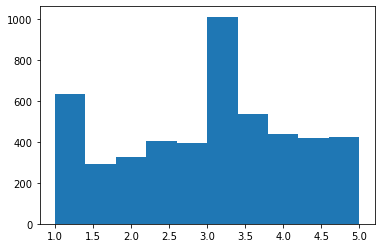

In [24]:
import matplotlib.pyplot as plt
plt.hist(score)

In [25]:
Final = pd.DataFrame()
Final['Recency Score'] = df2.loc[score.index]['Recency Score']
Final['Frequency Score'] = dF.loc[score.index]['Scores']
Final['Monetary Score'] = dM.loc[score.index]['Monetary Score']
Final['Overall Score'] = score
Final.head()

,Recency Score,Frequency Score,Monetary Score,Overall Score
Customer ID,,,,
PB-192102,5,5,5,5.0
RA-199154,5,5,5,5.0
PS-190453,5,5,5,5.0
AT-107352,5,5,5,5.0
MM-179203,5,5,5,5.0


In [26]:
Final.describe()

,Recency Score,Frequency Score,Monetary Score,Overall Score
count,4873.000000,4873.000000,4873.000000,4873.000000
mean,2.999590,2.999590,2.999590,2.999590
std,1.414359,1.414359,1.414359,1.118748
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [27]:
Final.to_csv('q6_RFM_ANALYSIS.csv')